# Introduction

This notebook tracks 5 metrics for **Standard** type volunteers:

1. Total number of Standard volunteers  
2. Number of Standard volunteers who donated
3. % donators of total Standard volunteers
4. Total dollar amount donated by Standard volunteers
5. Average donation for Standard volunteers who donated

by Fred Etter - December, 2019

In [1]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import sklearn
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

In [2]:
# Read in the data
df = pd.read_csv('file1_12_3.csv', low_memory=False)

In [3]:
# show the first 5 lines of the data
df.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,NaN,NaN,1977.0,female
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,NaN,NaN,1968.0,female
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,NaN,NaN,1958.0,male
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,NaN,NaN,NaN,male
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,NaN,NaN,1947.0,female


In [4]:
# show the number of rows and columns of the original data
df.shape

(385722, 7)

In [5]:
# drop Council, Committe, Board members
df = df.drop(df[df.VolType == 'Council, Committe or Board'].index).fillna(0)

# drop people who did not volunteer
df = df.drop(df[df.VolType == 0].index)

In [6]:
df.sample(5)

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
379020,b13d80dc-532f-e211-a46f-404056a2f946,2016,750.0,Standard,1.0,1984.0,female
382286,d14ab7d0-11cd-e111-941f-00259073dc22,2014,0.0,Standard,1.0,1948.0,female
382549,4927258b-57c9-e211-a0e0-4040184c1c1a,2012,0.0,Standard,1.0,0.0,female
379470,113815d2-11cd-e111-941f-00259073dc22,2012,156.0,Standard,1.0,0.0,male
382428,ced0ece2-f8c9-e211-a0e0-4040184c1c1a,2012,0.0,Standard,1.0,0.0,male


In [7]:
df.shape

(8439, 7)

In [8]:
df_year = df.groupby('Year').count().reset_index()

In [9]:
df_year.head(10)

,Year,ContactId,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
0,2010,318,318,318,318,318,318
1,2011,1263,1263,1263,1263,1263,1263
2,2012,2145,2145,2145,2145,2145,2145
3,2013,1533,1533,1533,1533,1533,1533
4,2014,410,410,410,410,410,410
5,2015,661,661,661,661,661,661
6,2016,797,797,797,797,797,797
7,2017,657,657,657,657,657,657
8,2018,338,338,338,338,338,338
9,2019,317,317,317,317,317,317


### 1.  Total number of Standard volunteers:

Text(0.5, 1.0, 'Number of Standard volunteers by year')

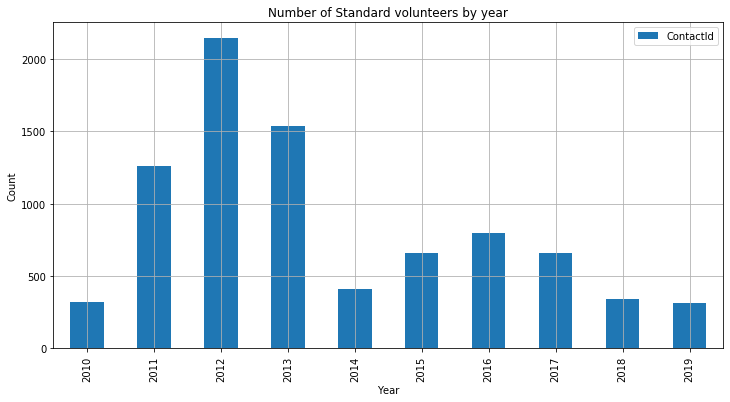

In [10]:
ax = df_year.plot.bar(x = 'Year', y = 'ContactId', figsize=(12, 6))
ax.grid()
plt.xlabel("Year")
plt.ylabel('Count')
plt.title('Number of Standard volunteers by year')

In [11]:
df_donators = df.drop(df[df.PledgeTotal == 0].index)

In [12]:
df_donators = df_donators.groupby('Year').count().reset_index()

### 2.  Number of Standard donators:

Text(0.5, 1.0, "Number of Standard 'donators' by year")

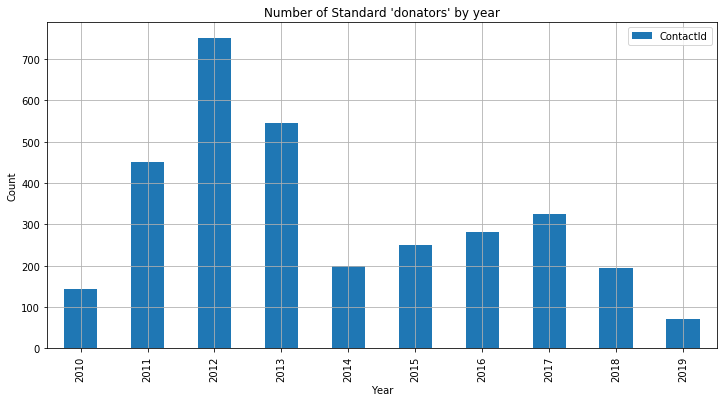

In [13]:
ax = df_donators.plot.bar(x = 'Year', y = 'ContactId', figsize=(12, 6))
ax.grid()
plt.xlabel("Year")
plt.ylabel('Count')
plt.title("Number of Standard 'donators' by year")

In [14]:
df_new = pd.merge(df_year, df_donators, how='left', left_on=['Year'], right_on = ['Year'])

In [15]:
df_new['percent'] = df_new.ContactId_y/df_new.ContactId_x

### 3.  Percentage of donators per Standard volunteer:

Text(0.5, 1.0, 'Percentage of donators per Standard volunteer')

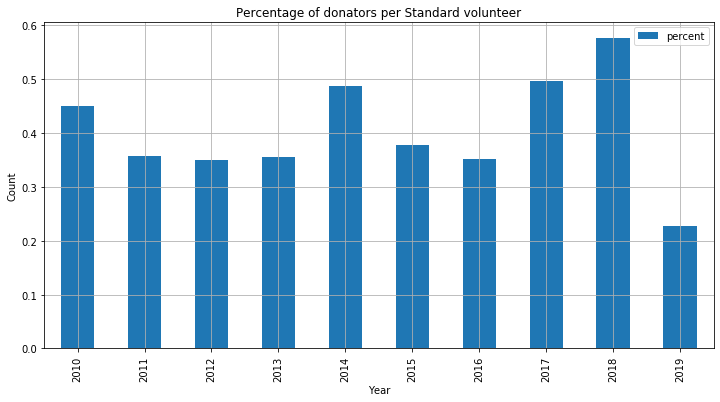

In [16]:
ax = df_new.plot.bar(x = 'Year', y = 'percent', figsize=(12, 6))
ax.grid()
plt.xlabel("Year")
plt.ylabel('Count')
plt.title("Percentage of donators per Standard volunteer")

In [17]:
df_dollar = df.groupby('Year').sum().reset_index()

In [18]:
df_dollar

,Year,PledgeTotal,VolunteerActivityCnt,BirthYear
0,2010,103374.83,347.0,246222.0
1,2011,208824.67,1322.0,622140.0
2,2012,380044.49,2240.0,1133082.0
3,2013,279998.00,1667.0,670224.0
4,2014,249306.03,696.0,321063.0
5,2015,247659.65,938.0,440565.0
6,2016,202918.67,1236.0,546128.0
7,2017,301243.45,854.0,474863.0
8,2018,297203.32,449.0,305867.0
9,2019,31677.89,368.0,197505.0


### 4.  Total Standard volunteer donations:

Text(0.5, 1.0, 'Total donations per Standard volunteer')

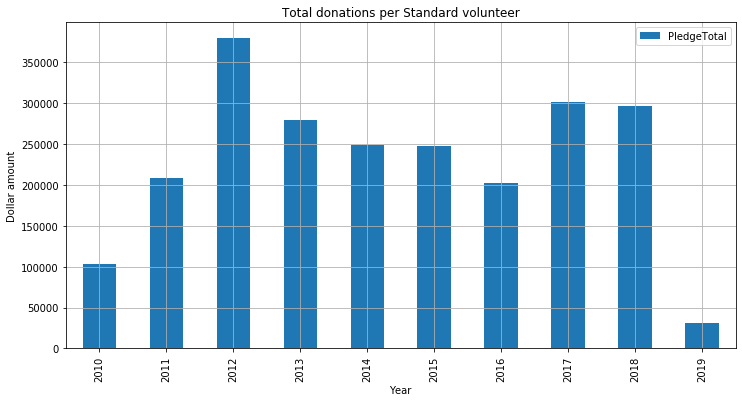

In [19]:
ax = df_dollar.plot.bar(x = 'Year', y = 'PledgeTotal', figsize=(12, 6))
ax.grid()
plt.xlabel("Year")
plt.ylabel('Dollar amount')
plt.title("Total donations per Standard volunteer")

In [20]:
# drop people who did not donate
df_avg = df.drop(df[df.PledgeTotal == 0].index)

In [21]:
df_avg.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
375806,49cf82d3-a409-e311-95aa-4040184c1c1a,2018,11500.0,Standard,1.0,1964.0,male
376124,508d9fcb-7cfc-e811-8122-0050569e2a4f,2019,260.0,Standard,1.0,1996.0,female
376125,c059dbce-11cd-e111-941f-00259073dc22,2019,2500.0,Standard,1.0,0.0,female
376860,306b218c-01b2-e811-80fb-0050569e2a4f,2019,400.0,Standard,1.0,0.0,male
376861,89bb62d1-11cd-e111-941f-00259073dc22,2018,130.0,Standard,1.0,1977.0,female


### 5.  Average donation when Standard volunteers donated:

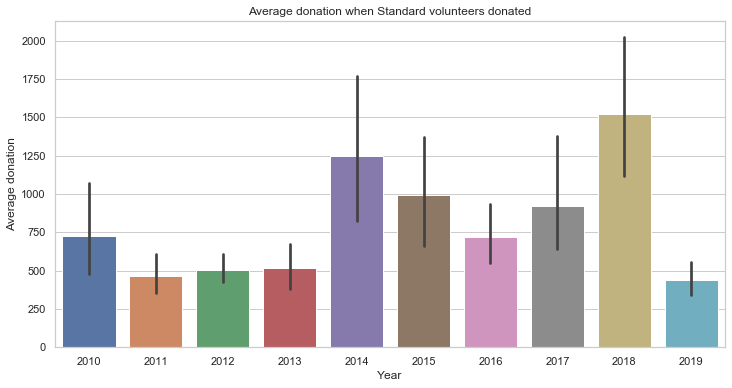

In [22]:
sns.set(style="whitegrid", rc={'figure.figsize':(12, 6)})
sns.barplot(x='Year', y='PledgeTotal', ci=95, data=df_avg)
# plt.xlabel('0 = Volunteer, 1 = Non Volunteer')
plt.ylabel('Average donation')
plt.title('Average donation when Standard volunteers donated')
plt.show()

The black vertical lines in the above graph show the range that the mean could take with 95% confidence.  

Remember, the average donation for a Non Volunteer is about **260 USD**.